In [2]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import math


In [3]:
def load_image_data(folder_id: int, image_id: int):
    file_name = './data/kids drawing-train/' + str(folder_id) + '/SimpleTest/' + str(image_id)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    return (pd.read_csv(file_name + '.csv'), file_name + '.png') 

In [74]:
(df, img) = load_image_data(7554, 9)
df.head(10)

,X,Y,Pressure,TiltX,TiltY,Time
0,1059.92747430419,842.854833,0.076402,-4257.0,988.0,00:04.5448411
1,1059.92747430419,842.854833,0.076402,-4257.0,988.0,00:04.5604847
2,1060.55941794665,842.960157,0.083482,-4257.0,988.0,00:04.5761906
3,1061.13869961889,842.696847,0.097642,-4257.0,988.0,00:04.5918112
4,1061.40200946992,842.591523,0.132555,-4257.0,988.0,00:04.6073533
5,1062.24460099319,843.065481,0.193347,-4257.0,988.0,00:04.6230509
6,1062.24460099319,843.065481,0.209216,-4257.0,988.0,00:04.6386818
7,1062.61323478462,843.960734,0.240711,-4257.0,988.0,00:04.6542307
8,1062.56057281441,845.487932,0.278798,-4257.0,988.0,00:04.6698481
9,1062.03395311237,846.488509,0.280751,-4257.0,988.0,00:04.7011493


In [75]:
def col_X_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
    
    if re.search("^[a-zA-Z]", data_as_str) is not None:
        return defualt_value
    return float(data_as_str)


In [76]:
def col_Y_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str

    return float(data_as_str)



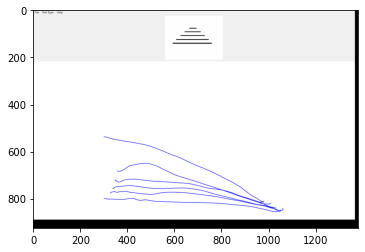

In [77]:
img1 = mpimg.imread('./data/kids drawing-train/' + "7554" + '/SimpleTest/' + "9.png")
plt.imshow(img1)

In [78]:
(float(df['X'][0]) + 0.2 * float(df[' Pressure'][0]))
(float(df['X'][2])) - (float(df['X'][1]))

0.6319436424601008

In [79]:
df[' Time'][0]
def to_number(date_as_str, defualt_value):
    if not date_as_str:
        return defualt_value
    
    if type(date_as_str) == float:
        return date_as_str
    
    (p1, p2) = date_as_str.split(':')
    p1 = float(p1)
    p2 = float(p2)
    return p1 * 60 + p2

In [80]:
df["Time"] = df[" Time"]
df["Time"][0] = to_number(df["Time"][0], 0)
df["Y"] = df[" Y"]
df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
df["X"][0] = col_X_ToNum(df["X"][0], 0)


flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["Time"][index] = to_number(df["Time"][index], df["Time"][index - 1])
        df["Y"][index] = col_Y_ToNum(df["Y"][index], df["Y"][index - 1])
        df["X"][index] = col_X_ToNum(df["X"][index], df["X"][index - 1])

df["X"]

C:\Users\moria\AppData\Local\Temp\ipykernel_31928\2886399278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"][0] = to_number(df["Time"][0], 0)
C:\Users\moria\AppData\Local\Temp\ipykernel_31928\2886399278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
C:\Users\moria\AppData\Local\Temp\ipykernel_31928\2886399278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["X"][0] = col

0       1059.927474
1       1059.927474
2       1060.559418
3         1061.1387
4       1061.402009
           ...     
1098     302.490357
1099     301.911075
1100     301.911075
1101     301.911075
1102     301.911075
Name: X, Length: 1103, dtype: object

In [81]:
df["Y"]

0       842.854833
1       842.854833
2       842.960157
3       842.696847
4       842.591523
           ...    
1098    538.257997
1099    538.626631
1100    538.626631
1101           NaN
1102           NaN
Name: Y, Length: 1103, dtype: float64

In [82]:
df["Time"]

0        4.544841
1        4.560485
2        4.576191
3        4.591811
4        4.607353
          ...    
1098    24.857857
1099    24.873481
1100    24.873481
1101          NaN
1102          NaN
Name: Time, Length: 1103, dtype: object

C:\Users\moria\AppData\Local\Temp\ipykernel_31928\2845424429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][0] = 0
C:\Users\moria\AppData\Local\Temp\ipykernel_31928\2845424429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]
c:\Users\moria\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._

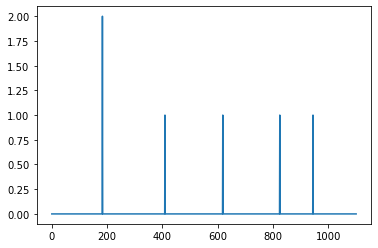

In [83]:
df["TimeDiff"] = np.full(len(df.index), 0)
df["TimeDiff"][0] = 0
flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]
        

plt.plot(df["TimeDiff"])

## Q.1.

Counting lines

In [103]:
def Count_lines(df):
    if (df['X'][1]-df['X'][0]) ==0:
        slp = 0
    else:
        slp = (df['Y'][1]-df['Y'][0])/(df['X'][1]-df['X'][0])
    
    numOfLines = 0
    prev = 0
    i = 0
    current_slp = slp
    while (i+1)<len(df):
        if (df['Y'][i]!= df['Y'][i+1]) & (df['X'][i]!= df['X'][i+1]):
            current_slp = (df['Y'][i+1]-df['Y'][i])/(df['X'][i+1]-df['X'][i])    
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            slp = current_slp
        else:
            if i-prev>60:
                print("current_slp:   ", current_slp)
                print("slp:   ", slp)
                numOfLines +=1
                prev = i                    
        slp = current_slp
        i+=1
    
    return numOfLines

לפעמים מספר הקווים הוא לא בדיוק כמו שיוצא בפונקצייה, כנראה פשוט צריך לשחק current_slp<=slp+0.4

In [104]:
Count_lines(df)

current_slp:    -4.000000000341091
slp:    0.06455456648209154
current_slp:    1.142857142858773
slp:    0.10508399319174139
current_slp:    -1.4285714285746889
slp:    -0.5454545454532074
current_slp:    0.20000000000228832
slp:    -0.3333333333333333
current_slp:    -0.49999999999991007
slp:    0.5


5

## Q.2.

Compute the length of each line and the avarage pressure applied by clicking on each line

In [105]:
def Lengths_of_lines(df):
    if (df['X'][1]-df['X'][0]) ==0:
        slp = 0
    else:
        slp = (df['Y'][1]-df['Y'][0])/(df['X'][1]-df['X'][0])
    lenOfLine = 0
    prev = 0
    i = 0
    current_slp = slp
    sum_pressures = 0
    while (i+1)<len(df):
        if (df['Y'][i]!= df['Y'][i+1]) & (df['X'][i]!= df['X'][i+1]):
            current_slp = (df['Y'][i+1]-df['Y'][i])/(df['X'][i+1]-df['X'][i])
        else:
            current_slp = slp
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            sum_pressures += float(df[" Pressure"][i])
            
        else:
            if i-prev>60:
                # print(i)
                dist = math.dist([df['X'][i] , df['Y'][i]],[df['X'][prev], df['Y'][prev]])
                lenOfLine +=1
                avg_pressure = sum_pressures/(i-prev)
                print("Length is " , dist , ", Avarage pressure is " , avg_pressure )
                prev = i
                sum_pressures =0
        slp = current_slp
        i+=1
    
    return 

In [106]:
Lengths_of_lines(df)

184
Length is  8.383845198757223 , Avarage pressure is  0.3758401578373235
411
Length is  11.835829059415724 , Avarage pressure is  0.5651697053651977
596
Length is  701.7778034277887 , Avarage pressure is  0.48468947362255405
789
Length is  29.402267876974925 , Avarage pressure is  0.46954232029655435
935
Length is  46.63677599254006 , Avarage pressure is  0.4821413061390185


## Q.3.

Count how many hand lifts were in the drawing

## Q.4.

(bonus)
4. לבדוק האם הצורה פתוחה או סגורה )בונוס - רק לגבי צורות מסוימות(